# UN Votes
Author: *Your name here*

## Introduction

How do various countries vote in the United Nations General Assembly, how have their voting patterns evolved throughout time, and how similarly or differently do they view certain issues?
Answering these questions (at a high level) is the focus of this analysis.

### Libraries

We will use the **pandas** and **seaborn** for data wrangling and visualization, and the **DT** package for interactive display of tabular output, and the **unvotes** package for the data.

In [1]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

### Data

The data we're using originally come from the **unvotes** R package.
In the chunk below we modify the data by joining the various data frames provided in the package to help you get started with the analysis.

In [2]:
un_votes = pd.read_csv("data/un_votes.csv")
un_roll_calls = pd.read_csv("data/un_roll_calls.csv")
un_roll_call_issues = pd.read_csv("data/un_roll_call_issues.csv")

In [3]:
un_votes.loc[un_votes["country"] == "United Kingdom", "country"] = "UK"
un_votes.loc[un_votes["country"] == "United States", "country"] = "US"

unvotes = un_votes.merge(
    un_roll_calls, how = "inner", on = "rcid"
).merge(
    un_roll_call_issues, how = "inner", on = "rcid"
)

In [4]:
unvotes

,rcid,country,country_code,vote,session,importantvote,date,unres,amend,para,short,descr,short_name,issue
0,6,US,US,no,1,0.0,1946-01-04,R/1/107,0.0,0.0,DECLARATION OF HUMAN RIGHTS,TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...,hr,Human rights
1,6,Canada,CA,no,1,0.0,1946-01-04,R/1/107,0.0,0.0,DECLARATION OF HUMAN RIGHTS,TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...,hr,Human rights
2,6,Cuba,CU,yes,1,0.0,1946-01-04,R/1/107,0.0,0.0,DECLARATION OF HUMAN RIGHTS,TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...,hr,Human rights
3,6,Dominican Republic,DO,abstain,1,0.0,1946-01-04,R/1/107,0.0,0.0,DECLARATION OF HUMAN RIGHTS,TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...,hr,Human rights
4,6,Mexico,MX,yes,1,0.0,1946-01-04,R/1/107,0.0,0.0,DECLARATION OF HUMAN RIGHTS,TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...,hr,Human rights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857873,9101,Venezuela,VE,yes,74,NaN,2019-12-03,A/RES/74/12,NaN,NaN,Division for Palestinian Rights of the Secreta...,Division for Palestinian Rights of the Secreta...,me,Palestinian conflict
857874,9101,Vietnam,VN,yes,74,NaN,2019-12-03,A/RES/74/12,NaN,NaN,Division for Palestinian Rights of the Secreta...,Division for Palestinian Rights of the Secreta...,me,Palestinian conflict
857875,9101,Yemen,YE,yes,74,NaN,2019-12-03,A/RES/74/12,NaN,NaN,Division for Palestinian Rights of the Secreta...,Division for Palestinian Rights of the Secreta...,me,Palestinian conflict
857876,9101,Zambia,ZM,yes,74,NaN,2019-12-03,A/RES/74/12,NaN,NaN,Division for Palestinian Rights of the Secreta...,Division for Palestinian Rights of the Secreta...,me,Palestinian conflict


## UN voting patterns

Let's create a data visualisation that displays how the voting record of the *UK & NI* changed over time on a variety of issues, and compares it to two other countries: *US* and *Turkey*.

We can easily change which countries are being plotted by changing which countries the code above `filter`s for.
Note that the country name should be spelled and capitalized exactly the same way as it appears in the data.
See the [Appendix](#appendix) for a list of the countries in the data.

In [7]:
countries = ["UK", "US", "Norway"]

votes = unvotes.query(
  "country == @countries"   
).assign(
  year = lambda df: pd.DatetimeIndex(df['date']).year,
  vote = lambda df: (df['vote'] == 'yes').astype(int)
).groupby(
  ["country", "year", "issue"],
  as_index = False
).agg(
  {'vote': 'mean'}   
)

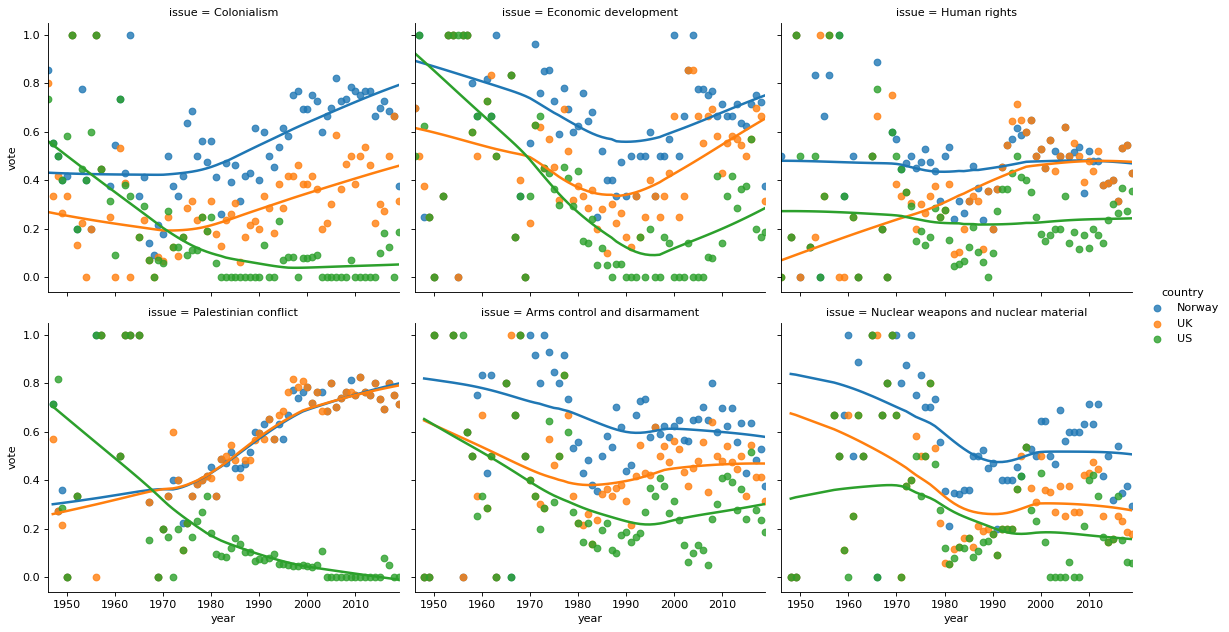

In [8]:
g = sns.FacetGrid(
    votes, col="issue", hue="country", col_wrap = 3, height=4, aspect=1.2
).map(
    sns.regplot, "year", "vote", lowess=True
).add_legend()

plt.show(g)

## References

1.  David Robinson (2017). [unvotes](https://CRAN.R-project.org/package=unvotes): United Nations General Assembly Voting Data. R package version 0.2.0.
2.  Erik Voeten "Data and Analyses of Voting in the UN General Assembly" Routledge Handbook of International Organization, edited by Bob Reinalda (published May 27, 2013).
3.  Much of the analysis has been modeled on the examples presented in the [unvotes package vignette](https://cran.r-project.org/web/packages/unvotes/vignettes/unvotes.html).
